<a href="https://colab.research.google.com/github/mohitsharmas97/ML_notebooks/blob/main/Part2_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [ ]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset.drop(['User ID','Gender'],axis=1,inplace=True)
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [ ]:
dataset.isnull().sum()

,0
Age,0
EstimatedSalary,0
Purchased,0


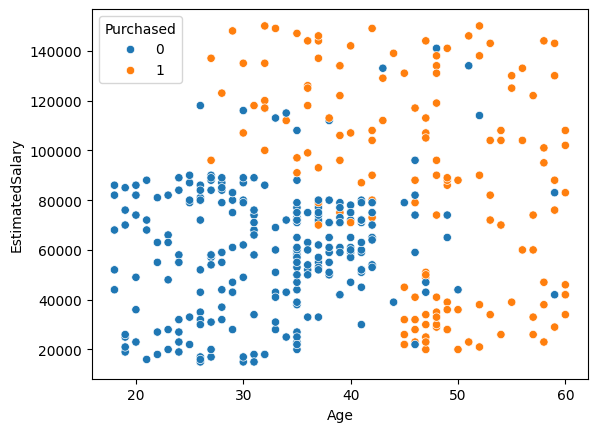

In [ ]:
sns.scatterplot(x=dataset["Age"],y=dataset["EstimatedSalary"],hue=dataset["Purchased"])
plt.show()

In [ ]:
x=dataset.iloc[:,:-1]
y=dataset["Purchased"]

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
sc = StandardScaler()
# cols = x.columns
# x = pd.DataFrame(sc.fit_transform(x), columns=cols)
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [ ]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier( max_depth=3) #preuning ----- max_depth=5

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
dt.score(x_test,y_test),dt.score(x_train,y_train)

(0.9125, 0.91875)

In [ ]:
dt.predict([[19,19000]])

array([1])

In [ ]:
from mlxtend.plotting import plot_decision_regions

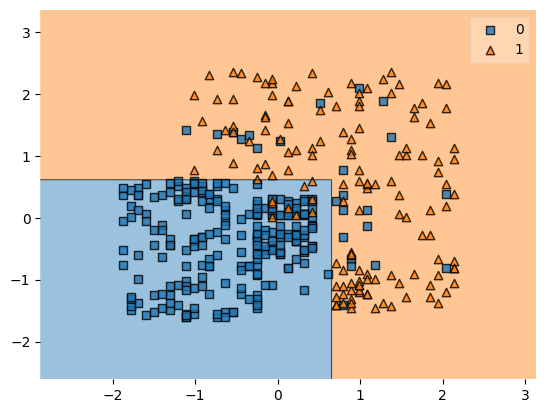

In [ ]:
plot_decision_regions(x.to_numpy(),y.to_numpy( ),dt)
plt.show()

In [ ]:
#graph analysis

In [ ]:
from sklearn.tree import plot_tree

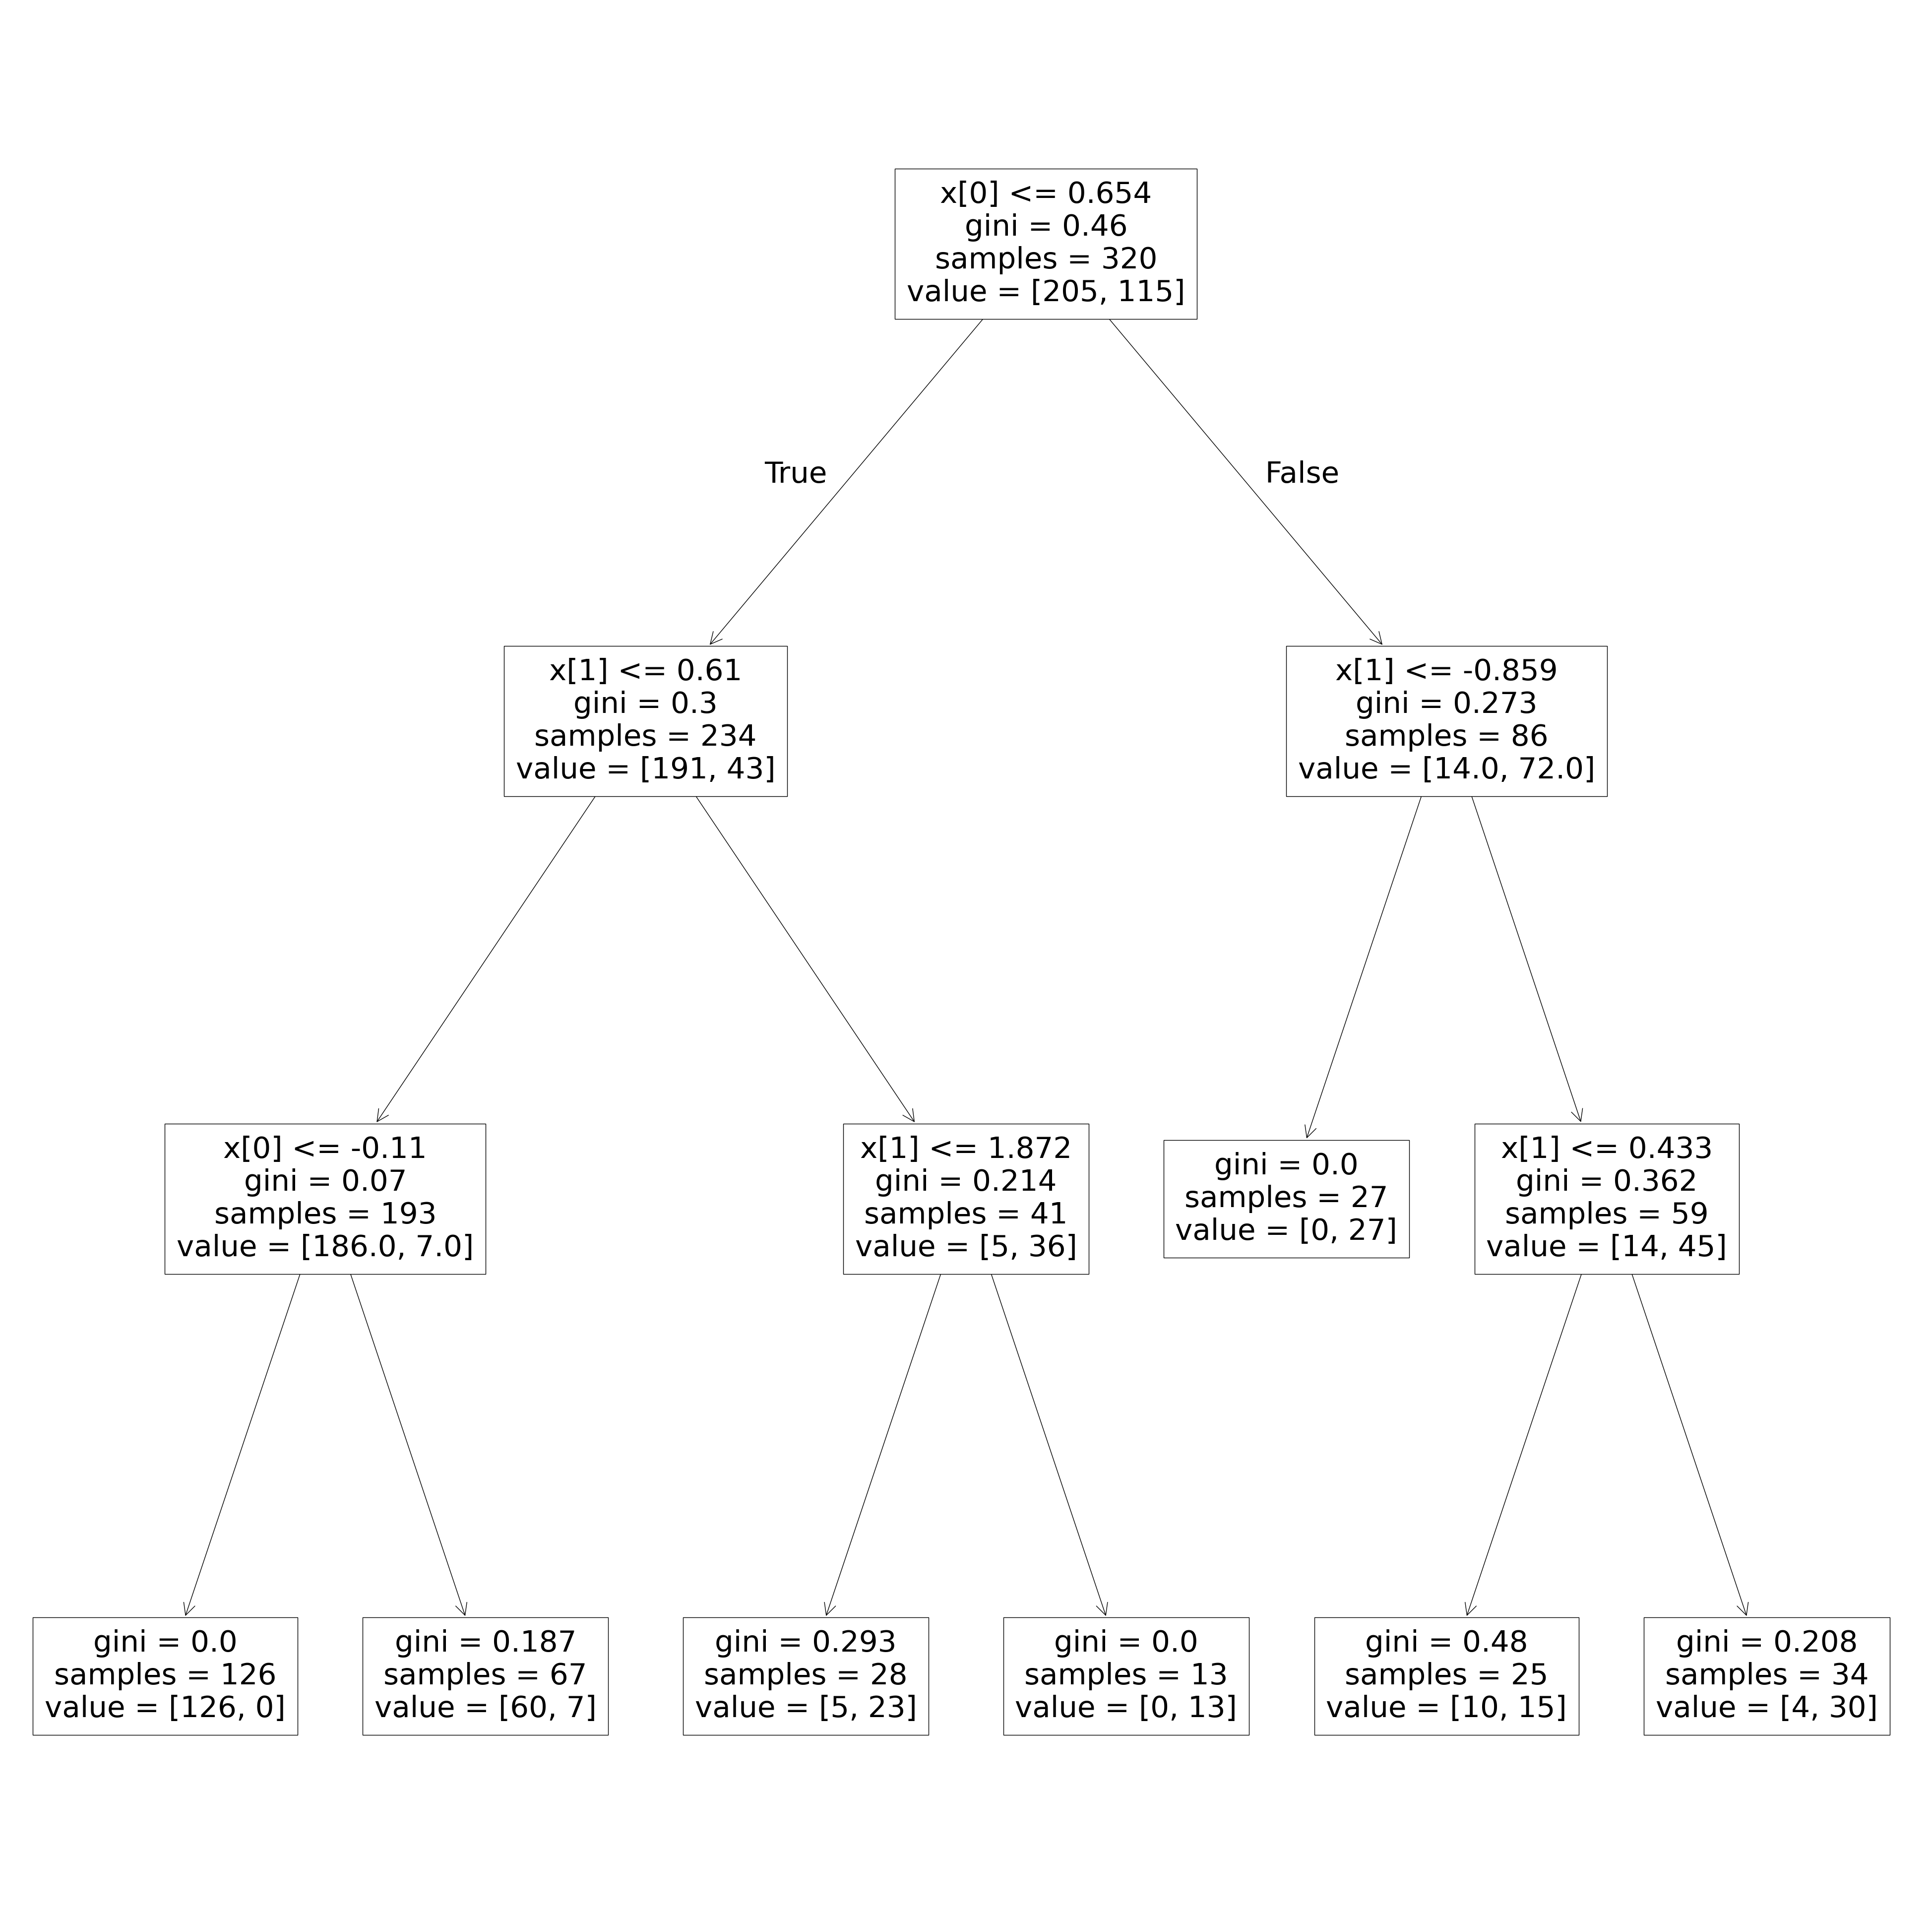

In [ ]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("tree.png")
plt.show()

In [ ]:
#

#Preuning